# Momentum Trading Strategy Backtest - VN30 Index

## Overview

### Importance of Stock Trading as an investment
Stock trading is a critical component of the financial markets and serves as a vital investment vehicle for both individuals and institutions. It enables investors to participate in the growth and success of companies, providing the potential for significant returns over the long term. The stock market in Vietnam has been experiencing significant growth and development in recent years, establishing itself as an attractive investment for both domestic and international investors.

### What is the VN30 Index?
The VN30 Index is a stock market index that represents the performance of the 30 largest and most liquid companies listed on the HCM city Stock Exchange (HOSE) in Vietnam. It is a subset of the broader VN-Index, which includes all companies listed on the HOSE. The VN30 index consists of 30 companies selected based on market value, trading volume, and free-float ratio. The index is reviewed and rebalanced twice a year to ensure it accurately reflects the market's top performers.

### What is Backtesting?
Backtesting is a crucial step in the development of any trading strategy. It involves applying a trading strategy to historical market data to evaluate its effectiveness before risking actual capital. By simulating the performance of a strategy over past data, traders can gain insights into how it might perform in the future.

### What is momentum strategy?
A momentum trading strategy is based on the premise that stocks which have performed well in the past will continue to perform well in the future, and conversely, those that have performed poorly will continue to underperform. Momentum traders capitalize on the continuance of existing trends in the market.\
Key principles of momentum strategy include:

- Trend Following: Identifying stocks that are trending up or down and making trades in the direction of the trend.
- Relative Strength: Comparing the performance of a stock to a benchmark or to other stocks to determine if it is outperforming or underperforming.
- Timing: Determining the optimal time to enter and exit trades based on momentum indicators such as moving averages, relative strength index (RSI), or MACD (Moving Average Convergence Divergence).

In this Jupyter notebook, we will backtest a momentum trading strategy. The steps involved are as follows:

1. Data Collection: Gather historical stock price data.
2. Strategy Definition: Define the momentum strategy rules and parameters.
3. Backtesting Framework: Create a backtesting framework to simulate the strategy on historical data.



### 1. Data Collection
##### 1.1. Price collection
We are going to collect OHLC (Open, High, Low, Close, Volume) data from DNSE by using requests library in Python.\
Next, We are going to put the data we just collected into a dictionary.


In [235]:

import pandas as pd
import numpy as np
import requests
from datetime import datetime
# import sys
# sys.path.append('F:\Data\API_Chien')
# from get_data_vn import get_data_cs


In [252]:
def getPrice(start,symbol): #function to get price from DNSE
    f = requests.get(f"https://services.entrade.com.vn/chart-api/v2/ohlcs/stock?from={start}&resolution=1D&symbol={symbol}&to=2654048800")
    dict_f = f.json()
    price = pd.DataFrame()
    price['Date'] = dict_f['t']
    price['Date'] = price['Date'].astype(int)
    price['Date'] = price['Date'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
    price['Date'] = pd.to_datetime(price['Date'])
    price['Open'] = dict_f['o']
    price['High'] = dict_f['h']
    price['Low'] = dict_f['l']
    price['Close'] = dict_f['c']
    price['Volume'] = dict_f['v']
    return price

In [328]:
vn30_list = ['FPT', 'MSN', 'SSI', 'GAS' ,'BID', 'BVH', 'POW', 'SHB', 'TPB', 'VNM' , 'VRE', 'VCB', 'HPG', 'ACB', 'HDB', 'MBB', 'SAB', 'CTG', 'MWG', 'VJC', 'TCB', 'PLX', 'STB', 'VPB', 'GVR', 'VHM', 'VIB', 'SSB', 'BCM' ,'VIC']
res = {}
for symbol in vn30_list:

    df = getPrice('2024-01-01',symbol)
    res[symbol] = df

In [378]:
temp = pd.concat(res,axis=1)
temp.reset_index(level=0, inplace=True)
temp=temp.dropna()
temp.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_2760\3507461623.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp.reset_index(level=0, inplace=True)


index                 FPT                                       \
                       Date   Open   High    Low  Close   Volume   
0     0 2024-01-02 02:00:00  83.69  83.69  82.65  82.82  1714500   
1     1 2024-01-03 02:00:00  82.56  83.34  82.39  83.17  1436900   
2     2 2024-01-04 02:00:00  83.17  84.98  83.08  83.94  2973900   
3     3 2024-01-05 02:00:00  84.03  84.20  83.34  84.12  1138600   
4     4 2024-01-08 02:00:00  84.12  84.89  83.86  84.03  1443000   

                  MSN              ...   BCM                      \
                 Date  Open  High  ...  High   Low Close  Volume   
0 2024-01-02 02:00:00  67.7  69.3  ...  63.1  61.9  61.9  349200   
1 2024-01-03 02:00:00  68.0  68.9  ...  61.7  60.6  61.5  623300   
2 2024-01-04 02:00:00  69.0  69.1  ...  61.6  60.8  60.8  547100   
3 2024-01-05 02:00:00  68.2  68.3  ...  61.0  60.0  60.5  515600   
4 2024-01-08 02:00:00  68.0  68.0  ...  60.8  60.0  60.3  550200   

                  VIC                                      
                 Date   Open   High   Low  Close   Volume  
0 2024-01-02 02:00:00  44.95  44.95  44.0  44.00  2281300  
1 2024-01-03 02:00:00  43.50  44.15  43.5  44.15  2275100  
2 2024-01-04 02:00:00  44.15  44.40  43.8  44.15  2337800  
3 2024-01-05 02:00:00  44.15  44.20  43.9  44.10  1481600  
4 2024-01-08 02:00:00  44.45  44.75  44.1  44.35  2534400  

[5 rows x 181 columns]

In [379]:
del temp

#### 1.2. Metrics calculation
Metric: Which stock had seen the most increase during the span of 3 days?

Steps to calculate:
1. Calculate gain in points for each stock
2. Calculate gain in % for each stock
3. Rank the stocks from highest % gain to lowest

In [314]:
#calculate gain by candle
gain_dic = {}
ohlc_dict = {
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum',
    'gain_pts': 'sum'
}
for symbol in res.keys():
    temp = res[symbol]
    temp['gain_pts']=temp['Close'].diff()
    temp_resample =temp.set_index('Date').resample('4D').apply(ohlc_dict).dropna().reset_index()
    temp_resample['gain_%'] = ((temp_resample['Close']/temp_resample['Close'].shift(1))-1)
    temp_resample = temp_resample.set_index('Date')
    gain_dic[symbol] = temp_resample['gain_%']


In [316]:
gain_df = pd.concat(gain_dic,axis=1)
gain_df.reset_index(level=0, inplace=True)
gain_df=gain_df.dropna()
gain_df.head()

,Date,FPT,MSN,SSI,GAS,BID,BVH,POW,SHB,TPB,...,TCB,PLX,STB,VPB,GVR,VHM,VIB,SSB,BCM,VIC
1,2024-01-06,-0.008203,-0.026510,-0.004392,-0.016839,0.034831,0.000000,0.013274,0.012987,-0.013889,...,0.039130,-0.015643,-0.003413,-0.002743,-0.018349,-0.002320,0.011771,-0.006356,-0.014876,-0.004535
2,2024-01-10,-0.019657,-0.019667,-0.004412,-0.010540,-0.001086,0.045000,0.000000,0.051282,0.045070,...,0.004184,0.008396,0.023973,0.026403,-0.046729,-0.039535,0.005058,0.000000,0.005034,-0.020501
3,2024-01-14,0.010515,0.023148,-0.005908,0.001332,0.018478,-0.015550,-0.004367,-0.024390,-0.010782,...,-0.017262,-0.011299,-0.006689,-0.017685,0.039216,0.014528,0.016608,-0.017058,0.000000,0.004651
4,2024-01-18,0.006292,0.022624,0.001486,0.019947,0.064034,0.002430,0.013158,0.012500,0.013624,...,0.026651,0.008722,0.020202,0.020731,0.004717,0.027446,0.014356,0.002169,0.021703,0.002315
5,2024-01-22,-0.012505,-0.014749,0.007418,-0.016949,-0.029087,-0.013333,-0.008658,0.008230,-0.024194,...,0.001180,-0.010137,0.006601,-0.002672,-0.018779,-0.022067,-0.023426,0.000000,0.006536,-0.011547


#### 1.3. Form a portfolio and calculate PNL

Now we have gotten our metric, time to backtest our strategy. Let's backtest a simple momentum strategy:
1. Find out the stocks that increased the most during the span of 3 days
2. Buy the stock, hold for 3 days
3. After 1 week, revise our list. Continue to hold if the stock is still in the list, otherwise sell. Buy new stocks that entered the list
4. Calculate pnl, compare with normal buy and hold strategy

#### Portfolio forming

In [317]:
def sort_symbols(row):
    # Drop the Date column and sort the rest
    sorted_symbols = row.drop('Date').sort_values(ascending=False).index.tolist()
    return sorted_symbols[:5]

# Apply the function to each row
gain_df['portfolio'] = gain_df.apply(sort_symbols, axis=1)
gain_df['portfolio'] = gain_df['portfolio'].shift(1)

In [318]:
portfolio = gain_df[['Date','portfolio']]
portfolio.head()

,Date,portfolio
1,2024-01-06,NaN
2,2024-01-10,"[TCB, BID, CTG, VCB, MBB]"
3,2024-01-14,"[SHB, CTG, TPB, BVH, ACB]"
4,2024-01-18,"[MWG, GVR, VCB, MSN, HPG]"
5,2024-01-22,"[BID, CTG, VHM, TCB, MWG]"


#### Calculating PNL

Given 100 million, we are going to distribute the capital equally to every stocks in the portfolio. As our portfolio consists of 5 stocks, we will invest 20 million to each stock in the portfolio. 
Then, we will compare this strategy to Buy and Hold strategy of buying and holding all 30 stocks in VN30 Index.

In [319]:
#calculate gain by candle
daily_gain_dic = {}
ohlc_dict = {
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum',
    'gain_pts': 'sum'
}
for symbol in res.keys():
    temp = res[symbol]
    temp['gain_pts']=temp['Close'].diff()
    temp_resample =temp.set_index('Date').resample('1D').apply(ohlc_dict).dropna().reset_index()
    temp_resample['gain_%'] = ((temp_resample['Close']/temp_resample['Close'].shift(1))-1)
    temp_resample = temp_resample.set_index('Date')
    daily_gain_dic[symbol] = temp_resample['gain_%']


In [330]:
daily_gain_df = pd.concat(daily_gain_dic,axis=1)
daily_gain_df.reset_index(level=0, inplace=True)
daily_gain_df=daily_gain_df.dropna()
daily_gain_df.head()

,Date,FPT,MSN,SSI,GAS,BID,BVH,POW,SHB,TPB,...,TCB,PLX,STB,VPB,GVR,VHM,VIB,SSB,BCM,VIC
1,2024-01-03,0.004226,0.007310,0.013846,0.005291,0.018605,0.005051,0.013333,0.027397,0.008671,...,0.015740,0.010226,0.027027,0.013408,0.031026,0.009302,0.015516,-0.027140,-0.006462,0.003409
2,2024-01-04,0.009258,-0.011611,0.019727,0.009211,-0.003425,0.007538,0.004386,0.017778,0.025788,...,0.015180,0.005656,0.003509,0.012679,-0.009259,0.001152,0.014752,0.010730,-0.011382,0.000000
3,2024-01-05,0.002144,-0.002937,0.016369,0.006519,0.019473,-0.002494,-0.013100,0.008734,0.005587,...,0.003115,0.002960,0.024476,-0.007621,0.018692,-0.008055,0.014538,0.002123,-0.004934,-0.001133
4,2024-01-08,-0.001070,-0.019146,-0.001464,-0.005181,0.042697,0.000000,0.008850,0.012987,-0.002778,...,0.027019,0.002656,-0.003413,0.002743,-0.013761,0.005800,0.009212,-0.012712,-0.003306,0.005669
5,2024-01-09,-0.007140,-0.007508,-0.002933,-0.011719,-0.007543,0.000000,0.004386,0.000000,-0.011142,...,0.011793,-0.018251,0.000000,-0.005470,-0.004651,-0.008074,0.002535,0.006438,-0.011609,-0.010147


In [331]:
daily_gain_df =pd.merge(left =daily_gain_df, right = portfolio, on = 'Date', how = 'left').ffill().dropna()


In [332]:

def calculate_portfolio_gain(row):
    capital = 100
    portfolio_len = 5
    portfolio = row['portfolio']
    gain_sum = sum((capital/portfolio_len)*row[symbol] for symbol in portfolio if pd.notna(row[symbol]))
    return gain_sum

daily_gain_df['portfolio_gain'] = daily_gain_df.apply(calculate_portfolio_gain, axis=1)


In [323]:
daily_gain_df.head()

,Date,FPT,MSN,SSI,GAS,BID,BVH,POW,SHB,TPB,...,STB,VPB,GVR,VHM,VIB,SSB,BCM,VIC,portfolio,portfolio_gain
5,2024-01-10,-0.019657,0.001513,-0.008824,-0.005270,0.029316,0.012500,-0.004367,0.025641,0.042254,...,0.008562,0.023652,0.009346,-0.006977,0.005058,-0.002132,-0.006711,-0.006834,"[TCB, BID, CTG, VCB, MBB]",1.629476
6,2024-01-11,0.003057,-0.001511,0.005935,0.006623,-0.018987,0.037037,0.021930,0.008333,0.000000,...,0.001698,0.002687,-0.018519,-0.016393,0.005033,0.008547,0.020270,0.001147,"[TCB, BID, CTG, VCB, MBB]",-0.812823
7,2024-01-12,-0.003047,-0.019667,-0.001475,-0.011842,-0.010753,-0.004762,-0.017167,0.016529,0.002703,...,0.013559,0.000000,-0.037736,-0.016667,-0.005008,-0.006356,-0.008278,-0.014891,"[TCB, BID, CTG, VCB, MBB]",0.946172
8,2024-01-15,0.007336,0.012346,-0.025111,0.007989,0.013043,-0.019139,-0.004367,-0.012195,-0.013477,...,-0.003344,-0.015541,0.007353,0.007264,0.007549,-0.006397,-0.006678,0.001163,"[TCB, BID, CTG, VCB, MBB]",0.383859
9,2024-01-16,0.003156,0.022866,0.015152,-0.001321,0.006438,0.000000,0.008772,0.004115,0.016393,...,0.003356,0.005444,0.019465,0.025240,0.013986,-0.015021,-0.001681,0.002323,"[TCB, BID, CTG, VCB, MBB]",0.092212


In [324]:
daily_gain_df['bnh_p'] = [vn30_list]*len(daily_gain_df)

In [325]:

def calculate_bnh_gain(row):
    capital = 100
    portfolio_len = 30
    portfolio = row['bnh_p']
    gain_sum = sum((capital/portfolio_len)*row[symbol] for symbol in portfolio if pd.notna(row[symbol]))
    return gain_sum

daily_gain_df['buy_and_hold'] = daily_gain_df.apply(calculate_bnh_gain, axis=1)

# Display the final DataFrame


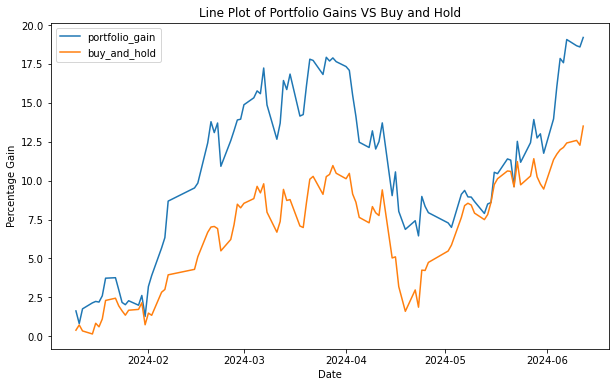

In [327]:
import matplotlib.pyplot as plt
A = daily_gain_df[['Date','portfolio_gain','buy_and_hold']]
plt.figure(figsize=(10, 6))

# Plot the first column
plt.plot(A['Date'], A['portfolio_gain'].cumsum(), label='portfolio_gain')

# Plot the second column
plt.plot(A['Date'], A['buy_and_hold'].cumsum(), label='buy_and_hold')

# Add titles and labels
plt.title('Line Plot of Portfolio Gains VS Buy and Hold')
plt.xlabel('Date')
plt.ylabel('Percentage Gain')

plt.legend()
# Display the plot
plt.show()

In [349]:
A.set_index('Date').cumsum().tail()

,portfolio_gain,buy_and_hold
Date,,
2024-06-06,17.573768,12.133139
2024-06-07,19.065132,12.418244
2024-06-10,18.665175,12.584103
2024-06-11,18.587396,12.274931
2024-06-12,19.197164,13.504512


In [376]:
def Sharp(pnl):
    ''' Tính Sharp ratio '''
    r = pnl.copy()
    s =r.mean()/r.std() * np.sqrt(252)
    return 'Sharpe: {:.3}'.format(s)

def maximum_drawdown_future(series):
    cumulative_max = series.cummax()

    # Calculate the drawdown at each point
    drawdown = (series - cumulative_max) / cumulative_max

    # Calculate the maximum drawdown
    max_drawdown = drawdown.min()
    return 'Max Draw Down: {:.3}%'.format(max_drawdown)
def PNL(pnl):
    r = pnl.cumsum().iloc[-1]
    return 'Return of the strategy: {:.3}%'.format(r)

In [377]:
print('Strategy backtest result: ')
print(Sharp(A['portfolio_gain']), maximum_drawdown_future(A['portfolio_gain']), PNL(A['portfolio_gain']))
print('Buy and Hold backtest result: ')
print(Sharp(A['buy_and_hold']), maximum_drawdown_future(A['buy_and_hold']), PNL(A['buy_and_hold']))

Strategy backtest result: 
Sharpe: 2.24 Max Draw Down: -2.7% Return of the strategy: 19.2%
Buy and Hold backtest result: 
Sharpe: 2.09 Max Draw Down: -3.12% Return of the strategy: 13.5%


Our strategy backtest result looks better than the Buy and Hold strategy, with higher Sharpe, lower MDD and higher return.

### Conclusion

Our momentum strategy performed better than VN30 index in the first 6 months of 2024. We managed to get higher sharpe, lower MDD and higher return with a strategy that requires rebalance after every 3 days.\
This looks very nice on paper. However, it requires more work and monitoring to be able to rebalance a strategy every 3 days.\
The drawbacks of our strategy is that we didn't account for fee & slippage. Our strategy also have a very short backtesting period.

#### Next steps

We should backtest the strategy on a longer period of time. In addition, slippage and fee should also be considered for the result to be more precise\


